In [1]:
from skmultiflow.data import WaveformGenerator
from sklearn.linear_model import SGDClassifier
from skmultiflow.evaluation import EvaluateHoldout
from skmultiflow.lazy import KNNADWINClassifier
from skmultiflow.trees import HoeffdingTreeClassifier
%matplotlib notebook 

This demo will test a holdout evaluation task when more than one learner is evaluated, which makes it a comparison task.

In [2]:
# Initialize the filestream
stream = WaveformGenerator()

In [3]:
# Initialize the classifiers
clf_one = HoeffdingTreeClassifier()
clf_two = KNNADWINClassifier(n_neighbors=8, max_window_size=2000)
clf_three = SGDClassifier()

In [4]:
# Set up the pipeline
classifiers = [clf_one, clf_two, clf_three]

In [5]:
# Initialize the evaluator
evaluator = EvaluateHoldout(test_size=500, dynamic_test_set=True, max_samples=40000, batch_size=1, n_wait=5000,
                                max_time=1000, output_file=None, show_plot=True, metrics=['kappa'])

<IPython.core.display.Javascript object>


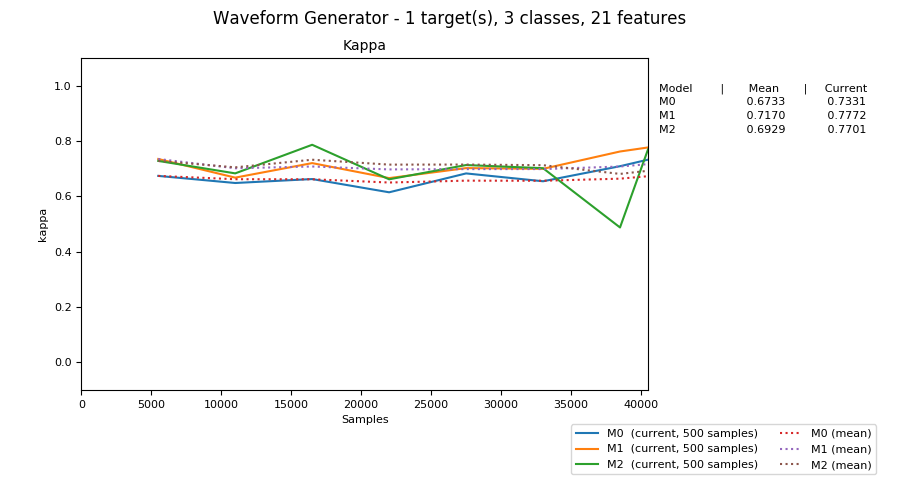

Holdout Evaluation
Evaluating 1 target(s).
Evaluating...
 ##------------------ [10%] [23.15s]Separating 500 holdout samples.
 #####--------------- [25%] [62.64s]Separating 500 holdout samples.
 #######------------- [35%] [87.59s]Separating 500 holdout samples.
 ##########---------- [50%] [126.33s]Separating 500 holdout samples.
 #############------- [65%] [164.90s]Separating 500 holdout samples.
 ################---- [80%] [203.41s]Separating 500 holdout samples.
 ##################-- [90%] [228.17s]Separating 500 holdout samples.
 #################### [100%] [252.94s]
Separating 500 holdout samples.
Processed samples: 40500
Mean performance:
M0 - Kappa        : 0.6733
M1 - Kappa        : 0.7170
M2 - Kappa        : 0.6929


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 KNNADWINClassifier(leaf_size=30, max_window_size=2000, metric='euclidean',
                    n_neighbors=8),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0,

In [6]:
evaluator.evaluate(stream=stream, model=classifiers)